In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
digits= load_digits()

In [26]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [29]:
#in data tha image value is stored in flatten form
d0= digits.data[0]
d0

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [28]:
I0= digits.images[0,:,:]
I0
digits.images.shape
# we have taken :, : bcz 

(1797, 8, 8)

In [32]:
T0= digits.target[0]
T0

0

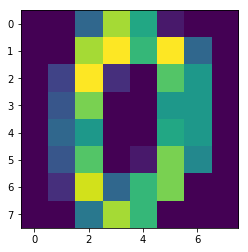

In [33]:
import matplotlib.pyplot as plt
plt.imshow(I0)

In [34]:
I1=I0.reshape

In [35]:
from sklearn.model_selection import train_test_split
[xtrain, xval, ytrain, yval]= train_test_split(digits.data, digits.target , test_size= 0.3, random_state=100)

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
#1 data is divided into 5 parts
kfold=KFold(n_splits=5, shuffle=True)
result =cross_val_score(model,xtrain,ytrain,cv=kfold,scoring='accuracy')
print(result.mean())

0.9530765825586542


In [37]:
from sklearn.metrics import accuracy_score
lg= LogisticRegression()
lg.fit(xtrain,ytrain)
lg_pred = lg.predict(xval)

lg_acc =accuracy_score(yval, lg_pred)
lg_acc


0.9592592592592593

In [42]:
#this metrix shows that the index (9,8) is having value 3 means 3 times value 9 is classified as 8
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, lg_pred, labels=None, sample_weight=None)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 58,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 48,  0,  1],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 43,  1],
       [ 0,  0,  0,  4,  0,  0,  0,  1,  3, 45]], dtype=int64)

In [43]:
df_pred = pd.DataFrame({'actual': yval,
                        'predicted': lg_pred})

In [46]:
df_pred.head()

,actual,predicted
0,9,9
1,9,3
2,0,0
3,2,2
4,4,4


In [47]:
df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']

In [48]:
check= df_pred.loc[df_pred['pred_status']== False]

In [49]:
check

,actual,predicted,pred_status
1,9,3,False
8,7,3,False
56,8,5,False
63,4,8,False
117,4,9,False
146,8,1,False
163,9,8,False
187,9,3,False
188,2,1,False
192,4,9,False


In [50]:
check.shape

(22, 3)